# LA-ICP-MS dataset processing
## required packets

In [1]:
from process_image import *

## basic settings
set some basic infos for the image procesing

In [2]:
settings = getBaseSettings()

# show debugging output
settings["showDebuggingOutput"] = True
# set the physical spot distance in µm
#settings["spot_distance_x"]     = 7.0
#settings["spot_distance_y"]     = 0.579150579150579

## export map AB4 Bereich 2
settings["spot_distance_x"]     = 6.312183673469388
settings["spot_distance_y"]     = 0.5892393822393822

# change interpolation between the lines in x direction [integer, 0 disables this option]
settings["stretch_x"]           = 6
# set the gaussian filter size in y direction [integer, 0 disables this option]
settings["smooth_y"]            = 3

## set the data source
select the datasource - if load_raw = True, the script expects a path to the raw dataset consisting of multiple *.xl files. Else, the script expects an excel file with multiple sheets.

If no `workingDirectory` or `excel_file` is set, the script opens a file dialog.


In [3]:
settings["load_raw"]     = True
settings["workingDirectory"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "raw format" + os.sep

settings["load_raw"]   = False
settings["excel_file"] = settings["home_dir"] + os.sep + "example_data" + os.sep + "excel_example.xlsx"

In [4]:
laser_data = LA_ICP_MS_LOADER(settings)

Selected working directory: D:\GIT\LA-ICP-MS\example_data\raw format\
loaded a dataset with the dimensions of 50 x 519 datapoints and 11 elements:
['²³Na', '²⁴Mg', '²⁷Al', '³⁹K', '⁴⁷Ti', '⁵¹V', '⁵²Cr', '⁵⁵Mn', '⁶⁶Zn', '⁸⁷Rb', '¹³⁷Ba']


# set calibration data if available

this dictionary requires the calibration factor for ppm in [signal / ppm]

Since the oxide form of every element has to be known, there is only a limited amount of known elements:

In [5]:
print('Known elements for calibration: ')
s = ''
for element in laser_data.oxide_dict: s += element+', '
print( s )


Known elements for calibration: 
Na, Mg, Al, K, Ti, V, Cr, Mn, Zn, Rb, Ba, Ca, Sr, P, Cu, Ni, Pb, As, 


In [6]:
calibration_area_2 = {
    "Na23":   1.171,
    "Mg24":   3.953,
    "Al27":   2.711,
    "K39":    9.495,
    "Ti47":   0.488,
    "V51":    5.701,
    "Cr52":   4.876,
    "Mn55":   5.554,
    "Zn66":   0.527,
    "Rb87":  18.741,
    "Ba137":  0.391
}

calibration_area_3 = {
    "Na23":   2.502,
    "Mg24":   6.373,
    "Al27":   4.361,
    "K39":    8.945,
    "Ti47":   0.796,
    "V51":    8.401,
    "Cr52":   5.959,
    "Mn55":  10.281,
    "Zn66":   0.801,
    "Rb87":  27.477,
    "Ba137":  0.771
}

laser_data.set_calibration_dictionary( calibration_area_2 )

# show an example image (first element in the set)

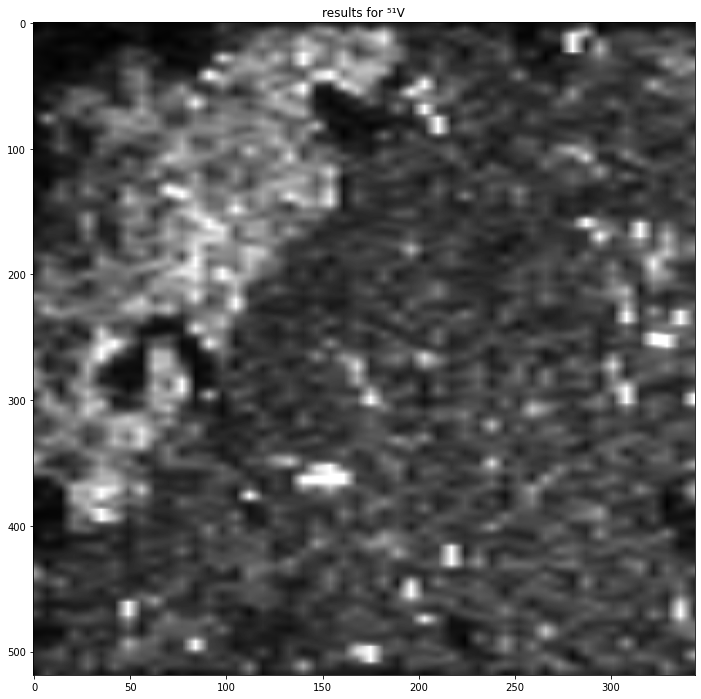

In [7]:
v51 = laser_data.show_single_image(element='V51')

In [8]:
laser_data.pre_processed_images()

print(laser_data.np_images.keys())


dict_keys(['Na23', 'Mg24', 'Al27', 'K39', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Zn66', 'Rb87', 'Ba137'])


In [9]:

print(get_isotope_abundance('Rb87'))

0.2783


alit
Na: 0.31164 +- 0.1728 m.-%
Mg: 0.83990 +- 0.4658 m.-%
Al: 3.34706 +- 1.8562 m.-%
K: 2.87398 +- 1.5938 m.-%
Ti: 1.63498 +- 0.9067 m.-%
V: 0.00551 +- 0.0031 m.-%
Cr: 0.02200 +- 0.0122 m.-%
Mn: 0.03151 +- 0.0175 m.-%
Zn: 0.26023 +- 0.1443 m.-%
Rb: 0.00867 +- 0.0048 m.-%
Ba: 0.12821 +- 0.0711 m.-%

belit
Na: 0.48670 +- 0.2536 m.-%
Mg: 1.31168 +- 0.6833 m.-%
Al: 5.22717 +- 2.7232 m.-%
K: 4.48835 +- 2.3383 m.-%
Ti: 2.55337 +- 1.3302 m.-%
V: 0.00861 +- 0.0045 m.-%
Cr: 0.03436 +- 0.0179 m.-%
Mn: 0.04921 +- 0.0256 m.-%
Zn: 0.40641 +- 0.2117 m.-%
Rb: 0.01355 +- 0.0071 m.-%
Ba: 0.20023 +- 0.1043 m.-%

C4AF
Na: 0.39233 +- 0.2042 m.-%
Mg: 1.05735 +- 0.5503 m.-%
Al: 4.21361 +- 2.1929 m.-%
K: 3.61805 +- 1.8829 m.-%
Ti: 2.05827 +- 1.0712 m.-%
V: 0.00694 +- 0.0036 m.-%
Cr: 0.02770 +- 0.0144 m.-%
Mn: 0.03967 +- 0.0206 m.-%
Zn: 0.32761 +- 0.1705 m.-%
Rb: 0.01092 +- 0.0057 m.-%
Ba: 0.16140 +- 0.0840 m.-%



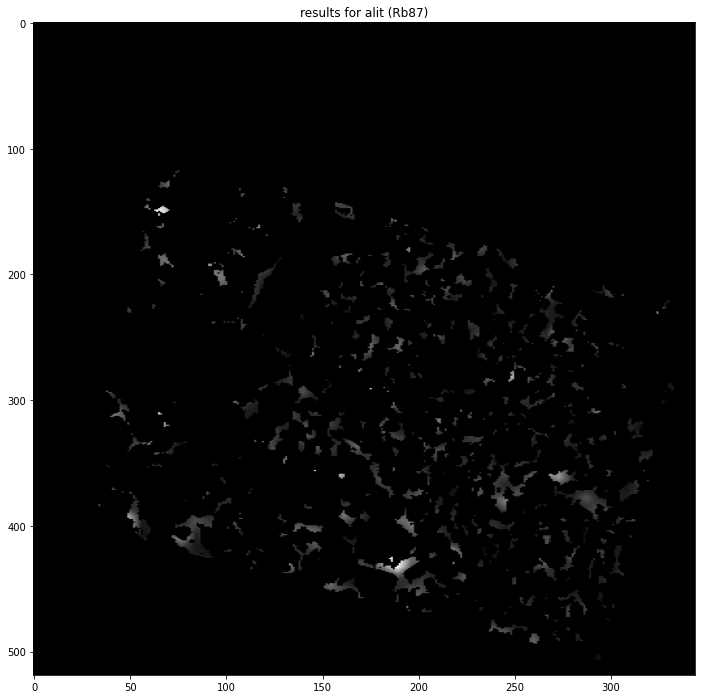

In [20]:
import cv2
import matplotlib.pyplot as plt

path = 'E:/nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/EDX-Daten/EDX Serie 2 06-2020/export map AB4 Bereich 2/Alignments/3/'
path = 'C:/Users/Florian Kleiner/Documents/Nextcloud/Uni/WdB/Paper/Laser-ICP&EDX/EDX-Daten/EDX Serie 2 06-2020/export map AB4 Bereich 2/Alignments/3/'

phases = [  'alit',
            'belit',
            'C4AF']

# get interpolated rawdata
#la_icp_ms_element, element_max = laser_data.optimize_img(laser_data.images['Rb87'], remove_outliers=False)
for phase_mask in phases:
    print(phase_mask)
    for element in laser_data.np_images.keys():
        #la_icp_ms_element, element_max = laser_data.optimize_img(laser_data.images[element], remove_outliers=False) 
        calibrated = laser_data.get_calibrated_images(element=element)

        la_icp_ms_element = calibrated[1]
        img = cv2.imread(path + 'aligned_edx_' + phase_mask + '.tif' , cv2.IMREAD_GRAYSCALE)

        # make shure the image is a mask
        _, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
        # make the threshold binary 
        mask = (thresh1/255).astype(int)

        # select pixel/values from the raw data
        selected_values = []
        for ix,iy in np.ndindex(mask.shape):
            if mask[ix,iy] == 1:
                selected_values.append(la_icp_ms_element[ix,iy])
        selected_values = np.array(selected_values)
        #some isotopes make only a small portion of an natual element
        isotope_abundance = get_isotope_abundance(element)

        iso_mean = selected_values.mean()
        iso_std  = selected_values.std()
        el_mean  = iso_mean/isotope_abundance
        el_std   = iso_std /isotope_abundance
        #print('{}: {:.5f} +- {:.4f} m.-% | {}: {:.5f} +- {:.4f} m.-%'.format(element, iso_mean, iso_std, get_element_from_isotope(element), el_mean, el_std))
        print('{}: {:.5f} +- {:.4f} m.-%'.format(get_element_from_isotope(element), el_mean, el_std))
        #print('{} ({:.4f}) to {}-factor: {:.4f}'.format(element, get_isotope_abundance(element), get_element_from_isotope(element), 1/get_isotope_abundance(element)))
        #show the EDX-selection
        if element == 'Rb87':
            # select pixel/values from the raw data
            selected = la_icp_ms_element*mask
            plt.rcParams['figure.figsize'] = [12, 12]
            plt.title('results for alit ({})'.format(element))
            plt.imshow(selected, aspect=laser_data.spot_distance_y/laser_data.spot_distance_x, cmap='gray', interpolation=None)
    print()